In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from FM.european_option import European_Option 


In [11]:
df = pd.read_csv('market_data.csv')

K = 100
r = 0.02
sigma = 0.2
T_expiry = 1.0

mc_call_prices = []
mc_put_prices = []

In [12]:
print("Starting Monte Carlo pricing over market history...")

for index, row in df.iterrows():
    S_t = row['Price']
    t = row['Time']
    
    T_remaining = T_expiry - t

    if T_remaining <= 0.001:
        call_val = max(0, S_t - K)
        put_val = max(0, K - S_t)
        
        mc_call_prices.append(call_val)
        mc_put_prices.append(put_val)
        continue

    eu_option = European_Option(S=S_t, K=K, r=r, sigma=sigma, T=T_remaining)

    c_price = eu_option.monte_carlo_price(option_type='call', n_simulations=5000)
    mc_call_prices.append(c_price)
    
    p_price = eu_option.monte_carlo_price(option_type='put', n_simulations=5000)
    mc_put_prices.append(p_price)

print("Pricing complete.")
print("Call Final Price: ", mc_call_prices[-1])
print("Put Final Price: ", mc_put_prices[-1])


Starting Monte Carlo pricing over market history...
Pricing complete.
Call Final Price:  28.779903502705594
Put Final Price:  0


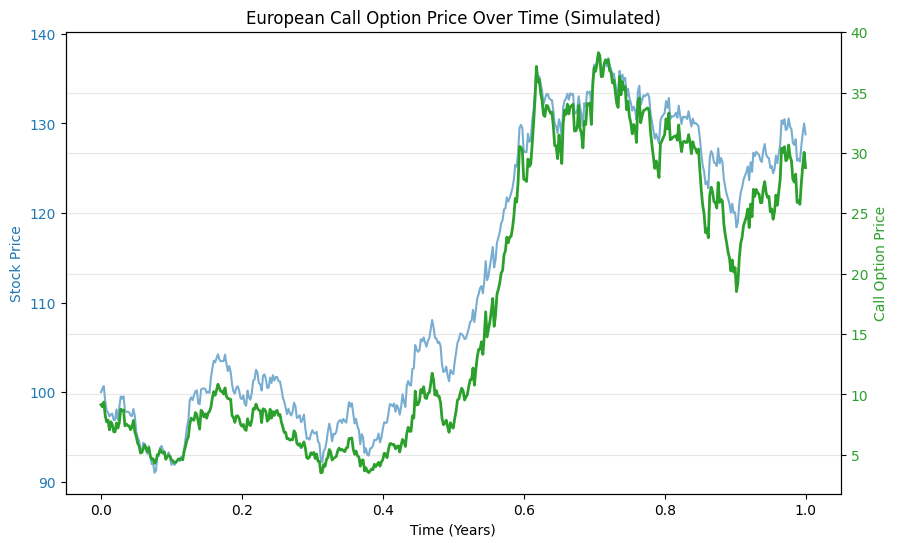

In [14]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Stock Price', color='tab:blue')
ax1.plot(df['Time'], df['Price'], label='Stock', color='tab:blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Call Option Price', color='tab:green')

ax2.plot(df['Time'], mc_call_prices, label='MC Call Price', color='tab:green', linewidth=2)
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('European Call Option Price Over Time (Simulated)')
plt.grid(True, alpha=0.3)
plt.show()

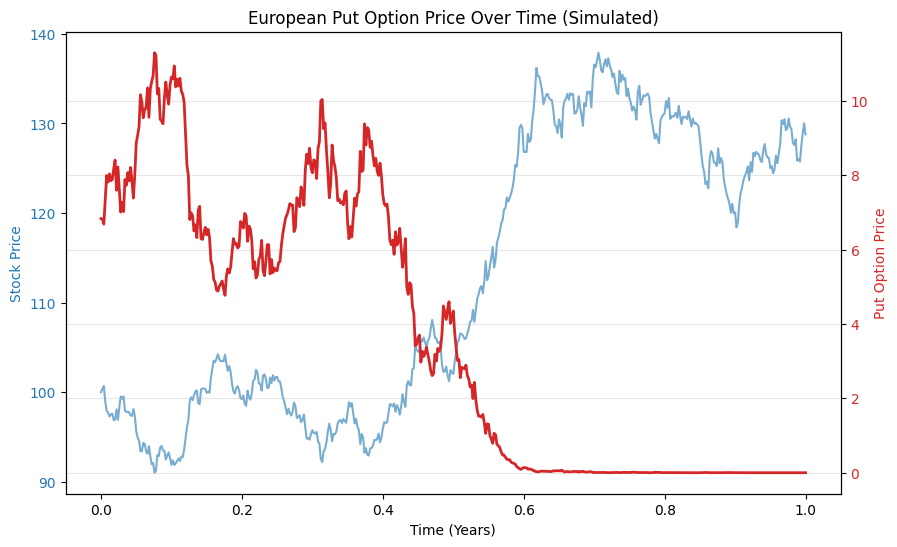

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Stock Price', color='tab:blue')
ax1.plot(df['Time'], df['Price'], label='Stock', color='tab:blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Put Option Price', color='tab:red')
ax2.plot(df['Time'], mc_put_prices, label='MC Put Price', color='tab:red', linewidth=2)
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('European Put Option Price Over Time (Simulated)')
plt.grid(True, alpha=0.3)
plt.show()